<a href="https://colab.research.google.com/github/Pannaga01/FDS_project/blob/main/FDS_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


In [ ]:
!kaggle competitions download -c kaggle-survey-2021

  0% 0.00/55.2k [00:00<?, ?B/s]
100% 55.2k/55.2k [00:00<00:00, 45.8MB/s]
  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 48.6MB/s]
  0% 0.00/2.86M [00:00<?, ?B/s]
100% 2.86M/2.86M [00:00<00:00, 92.8MB/s]


In [ ]:
!unzip /content/kaggle_survey_2021_responses.csv.zip

Archive:  /content/kaggle_survey_2021_responses.csv.zip
  inflating: kaggle_survey_2021_responses.csv  


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Visualization

In [ ]:
survey = pd.read_csv('/content/kaggle_survey_2021_responses.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
survey.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool

In [ ]:
survey.columns = survey.iloc[0]
survey.drop(0,axis=0)

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,"Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc)",Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - RStudio,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Visual Studio,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Visual Studio Code (VSCode),Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - PyCharm,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Spyder,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Notepad++,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Sublime Text,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Vim / Emacs,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Jupyter Notebook,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - None,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Other,Which of the following hosted notebook products do you 

## Questions

In [ ]:
for col in survey.columns:
  print(col)

Duration (in seconds)
What is your age (# years)?
What is your gender? - Selected Choice
In which country do you currently reside?
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Select the title most similar to your current role (or most recent title if retired): - Selected Choice
For how many years have you been writing code and/or programming?
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++
What programming languages do you use on a regular basis? 

In [ ]:
survey['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts()

Student                                                                                                    6804
Data Scientist                                                                                             3616
Software Engineer                                                                                          2449
Other                                                                                                      2393
Data Analyst                                                                                               2301
Currently not employed                                                                                     1986
Research Scientist                                                                                         1538
Machine Learning Engineer                                                                                  1499
Business Analyst                                                                                        

## Role - Student 

In [ ]:
student = survey[survey['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'] == 'Student']

## Age

In [ ]:
student_age = pd.DataFrame(student['What is your age (# years)?'].value_counts())
student_age['age'] = student_age.index
student_age.columns = ['count','age']
student_age['percentage'] = student_age['count']*100/student_age['count'].sum()

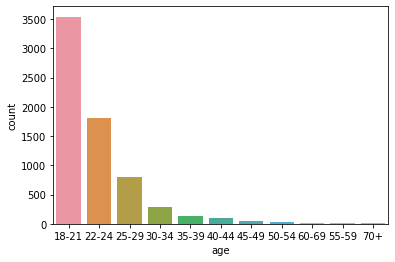

In [ ]:
sns.barplot(data = student_age,x = 'age',y = 'count')

In [ ]:
fig = go.Figure(data=[go.Pie(labels=student_age['age'], values=student_age['percentage'], hole=.3)])
fig.show()

## Gender

In [ ]:
student_gender = pd.DataFrame(student['What is your gender? - Selected Choice'].value_counts())
student_gender['gender'] = student_gender.index
student_gender.columns = ['count','gender']
student_gender['percentage'] = student_gender['count']*100/student_gender['count'].sum()

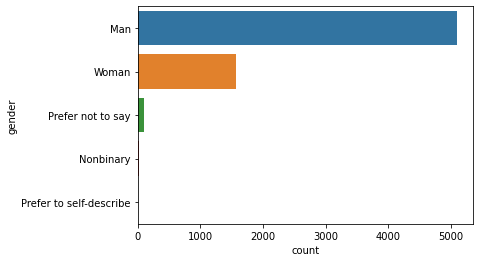

In [ ]:
sns.barplot(data = student_gender,x = 'count',y = 'gender')

In [ ]:
fig = go.Figure(data=[go.Pie(labels=student_gender['gender'], values=student_gender['percentage'], hole=.3)])
fig.show()

## Country

In [ ]:
country = pd.DataFrame(student['In which country do you currently reside?'].value_counts())
country['country'] = country.index
country.columns = ['count','country']
country['percentage'] = country['count']*100/country['count'].sum()
country.sort_values('percentage',ascending=False)
country.head(10)
top_countries = pd.DataFrame(country.iloc[:10])

In [ ]:
country.shape

(66, 3)

In [ ]:
top_countries.head(10)

,count,country,percentage
India,2845,India,41.813639
United States of America,452,United States of America,6.643151
China,386,China,5.673133
Other,255,Other,3.747795
Pakistan,165,Pakistan,2.425044
Japan,148,Japan,2.175191
Nigeria,139,Nigeria,2.042916
Brazil,136,Brazil,1.998824
Bangladesh,133,Bangladesh,1.954733
Indonesia,128,Indonesia,1.881246


#### Top 10 countries

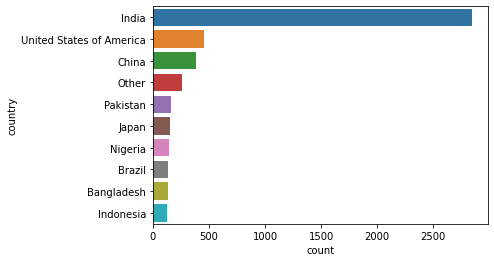

In [ ]:
sns.barplot(x = top_countries['count'],y = top_countries['country'])

In [ ]:
fig = go.Figure(data=[go.Pie(labels=top_countries['country'], values=top_countries['percentage'], hole=.3)])
fig.show()

## Education

In [ ]:
education = pd.DataFrame(student['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts())
education['education'] = education.index
education.columns = ['count','education']
education['percentage'] = education['count']*100/education['count'].sum()

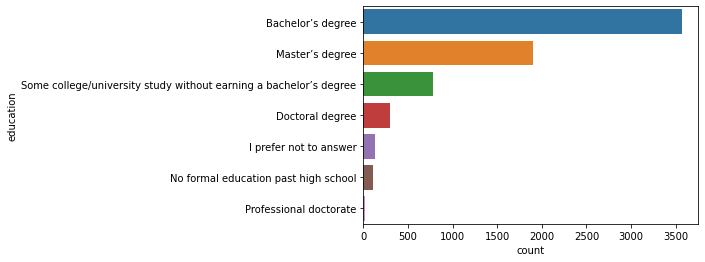

In [ ]:
sns.barplot(data = education,x = 'count',y = 'education')

In [ ]:
fig = go.Figure(data=[go.Pie(labels=education['education'], values=education['percentage'], hole=.3)])
fig.show()

## Coding Experience

In [ ]:
coding = pd.DataFrame(student['For how many years have you been writing code and/or programming?'].value_counts())
coding['years'] = coding.index
coding.columns = ['count','years']
coding['percentage'] = coding['count']*100/coding['count'].sum()

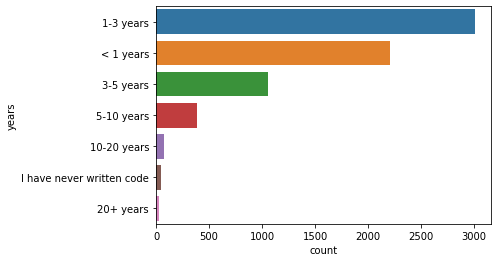

In [ ]:
sns.barplot(data = coding,x = 'count',y = 'years')

In [ ]:
coding = student[student['For how many years have you been writing code and/or programming?'] != 'I have never written code']

## Programming languages

In [ ]:
columns = ['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python','What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R',
'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL',
'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C',
'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++',
'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java',
'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript',
'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia',
'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift',
'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash',
'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB',
'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None',
'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other']
languages = ['Python','SQL','C','C++','Java','Javascript','Julia','Swift','Bash','MATLAB','None','Other']
language_count = []
for col in columns:
  arr = coding[col]
  language_count.append(arr.count())

In [ ]:
print(language_count)

[6185, 1180, 2095, 2083, 2364, 1675, 1141, 64, 36, 302, 991, 56, 314]


In [ ]:
fig = go.Figure(data=[go.Pie(labels=languages, values=language_count, hole=.3)])
fig.show()

## For how many years have you used machine learning methods?

In [ ]:
ml_years = pd.DataFrame(student['For how many years have you used machine learning methods?'].value_counts())
ml_years['years'] = ml_years.index
ml_years.columns = ['count','years']
ml_years['percentage'] = ml_years['count']*100 / ml_years['count'].sum()

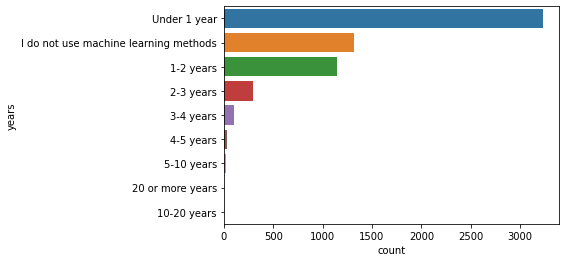

In [ ]:
sns.barplot(data = ml_years,x = 'count',y = 'years')

In [ ]:
fig = go.Figure(data=[go.Pie(labels=ml_years['years'], values=ml_years['percentage'], hole=.3)])
fig.show()

## Recommended Language

In [ ]:
recommended_language = pd.DataFrame(student['What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'].value_counts())
recommended_language['language'] = recommended_language.index
recommended_language.columns = ['count','language']
recommended_language['percentage'] = recommended_language['count']*100/recommended_language['count'].sum()

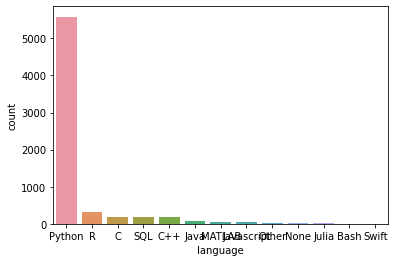

In [ ]:
sns.barplot(data = recommended_language,x = 'language',y = 'count')

In [ ]:
fig = go.Figure(data=[go.Pie(labels=recommended_language['language'], values=student_age['percentage'], hole=.3)])
fig.show()

## Interactive Development Environments

In [ ]:
columns = ["Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc) ",
"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  RStudio ",
"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio ", 
"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio Code (VSCode) ", 
"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  PyCharm ",
"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Spyder  ",
"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Notepad++  ",  
"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Sublime Text  ",  
"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Vim / Emacs  ",
"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  MATLAB ",
"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Jupyter Notebook"]

ide = ['Jupyter','RStudio','Visual Studio','Visual Studio Code (VSCode)','PyCharm','Spyder','Notepad++','Sublime Text','Vim / Emacs','MATLAB','Jupyter Notebook']
ide_count = []
for col in columns:
  arr = student[col]
  ide_count.append(arr.count())

In [ ]:
fig = go.Figure(data=[go.Pie(labels=ide, values = ide_count, hole=.3)])
fig.show()

## Hosted Notebook Product

In [ ]:
columns = ["Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Kaggle Notebooks",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Colab Notebooks",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Azure Notebooks",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Paperspace / Gradient ",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Binder / JupyterHub ",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Code Ocean ",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  IBM Watson Studio ",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Amazon Sagemaker Studio Notebooks ",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Amazon EMR Notebooks ",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Google Cloud Notebooks (AI Platform / Vertex AI) ",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Google Cloud Datalab",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Databricks Collaborative Notebooks ",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Zeppelin / Zepl Notebooks ",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Deepnote Notebooks ",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Observable Notebooks ",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - None",
"Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Other"]
hosted_notebook = ['Kaggle Notebooks','Colab Notebooks','Azure Notebooks','Paperspace / Gradient','Binder / JupyterHub','Code Ocean','IBM Watson Studio','Amazon Sagemaker Studio Notebooks','Amazon EMR Notebooks','Google Cloud Notebooks (AI Platform / Vertex AI)','Google Cloud Datalab','Databricks Collaborative Notebooks','Zeppelin / Zepl Notebooks','Deepnote Notebooks','Observable Notebooks','None','Other']
hosted_notebook_count = []
for col in columns:
  arr = student[col]
  hosted_notebook_count.append(arr.count())

In [ ]:
fig = go.Figure(data=[go.Pie(labels=hosted_notebook, values = hosted_notebook_count, hole=.3)])
fig.show()

## Data Visualization Libraries

In [ ]:
columns = ["What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Matplotlib ",
"What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Seaborn ",
"What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Plotly / Plotly Express ",
"What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Ggplot / ggplot2 ",
"What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Shiny ",
"What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  D3 js ",
"What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Altair ",
"What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Bokeh ",
"What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Geoplotlib ",
"What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Leaflet / Folium ",
"What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice - None",
"What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Other"]

visualization_libraries = ['Matplotlib','Seaborn','Plotly / Plotly Express','Ggplot / ggplot2','Shiny','D3 js','Altair','Bokeh','Geoplotlib','Leaflet / Folium','None','Other']
visualization_libraries_count = []
for col in columns:
  arr = student[col]
  visualization_libraries_count.append(arr.count())

In [ ]:
fig = go.Figure(data=[go.Pie(labels=visualization_libraries, values = visualization_libraries_count, hole=.3)])
fig.show()

## ML Frameworks

In [ ]:
columns = ['Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   Scikit-learn ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   TensorFlow ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Keras ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  PyTorch ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Fast.ai ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  MXNet ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Xgboost ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  LightGBM ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  CatBoost ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Prophet ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  H2O 3 ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Caret ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Tidymodels ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  JAX ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  PyTorch Lightning ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Huggingface ',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice - None',
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice - Other']

ml_frameworks = ['Scikit-learn','TensorFlow','Keras','PyTorch','Fast.ai','MXNet','Xgboost','LightGBM','CatBoost','Prophet','H2O 3','Caret','Tidymodels','JAX','PyTorch Lightning','Huggingface','None','Other']
ml_frameworks_count = []
for col in columns:
  arr = student[col]
  ml_frameworks_count.append(arr.count())

In [ ]:
fig = go.Figure(data=[go.Pie(labels=ml_frameworks, values = ml_frameworks_count, hole=.3)])
fig.show()

## ML Algorithms

In [ ]:
columns = ['Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression',
           'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Decision Trees or Random Forests',
           'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Gradient Boosting Machines (xgboost, lightgbm, etc)',
           'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Bayesian Approaches',
           'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Evolutionary Approaches',
           'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Dense Neural Networks (MLPs, etc)',
           'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Convolutional Neural Networks',
           'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Generative Adversarial Networks',
           'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Recurrent Neural Networks',
           'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Transformer Networks (BERT, gpt-3, etc)',
           'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - None',
           'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Other']
ml_algorithms = ['Linear or Logistic Regression','Decision Trees or Random Forests','Gradient Boosting Machines (xgboost, lightgbm, etc)','Bayesian Approaches','Evolutionary Approaches','Dense Neural Networks (MLPs, etc)','Convolutional Neural Networks','Generative Adversarial Networks','Recurrent Neural Networks','Transformer Networks (BERT, gpt-3, etc)','None','Other']
ml_algorithms_count = []
for col in columns:
  arr = student[col]
  ml_algorithms_count.append(arr.count())

In [ ]:
fig = go.Figure(data=[go.Pie(labels=ml_algorithms, values = ml_algorithms_count, hole=.3)])
fig.show()

## Computer Vision Methods

In [ ]:
columns = ['Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - General purpose image/video tools (PIL, cv2, skimage, etc)',
'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Image segmentation methods (U-Net, Mask R-CNN, etc)',
'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Object detection methods (YOLOv3, RetinaNet, etc)',
'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)',
'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Generative Networks (GAN, VAE, etc)',
'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - None',
'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']

cv_methods = ['General purpose image/video tools (PIL, cv2, skimage, etc)','Image segmentation methods (U-Net, Mask R-CNN, etc)','Object detection methods (YOLOv3, RetinaNet, etc)','Image classification and other general purpose networks (VGG, Inception, ResNet, EfficientNet, etc)','Generative Networks (GAN, VAE, etc)','None','Other']
cv_methods_count = []
for col in columns:
  arr = student[col]
  cv_methods_count.append(arr.count())

In [ ]:
fig = go.Figure(data=[go.Pie(labels=cv_methods, values = cv_methods_count, hole=.3)])
fig.show()

## NLP

In [ ]:
columns = ['Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Word embeddings/vectors (GLoVe, fastText, word2vec)',
'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Encoder-decorder models (seq2seq, vanilla transformers)',
'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Contextualized embeddings (ELMo, CoVe)',
'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Transformer language models (GPT-3, BERT, XLnet, etc)',
'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - None',
'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']
nlp_methods = ['Word embeddings/vectors (GLoVe, fastText, word2vec)','Encoder-decoder models (seq2seq, vanilla transformers)','Contextualized embeddings (ELMo, CoVe)','Transformer language models (GPT-3, BERT, XLnet, etc)','None','Other']
nlp_methods_count = []
for col in columns:
  arr = student[col]
  nlp_methods_count.append(arr.count())

In [ ]:
fig = go.Figure(data=[go.Pie(labels=nlp_methods, values = nlp_methods_count, hole=.3)])
fig.show()

## Data Science courses

In [ ]:
columns = ['On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera',
'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX',
'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses',
'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp',
'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai',
'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity',
'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udemy',
'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - LinkedIn Learning',
'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)',
'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - University Courses (resulting in a university degree)',
'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - None',
'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other']
ml_courses = ['Coursera','edX','Kaggle Learn Courses','DataCamp','Fast.ai','Udacity','Udemy','LinkedIn Learning','Cloud-certification programs (direct from AWS, Azure, GCP, or similar)','University Courses (resulting in a university degree)','None','Other']
ml_courses_count = []
for col in columns:
  arr = student[col]
  ml_courses_count.append(arr.count())

In [ ]:
fig = go.Figure(data=[go.Pie(labels=ml_courses, values = ml_courses_count, hole=.3)])
fig.show()